In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [61]:
df_new_sep = pd.read_csv("../../output/predictions_old_kpi_sep_360_days_2025-09-29.csv")
df_new_sep["date_uploaded"] = "2025-09-01"

df_new_aug = pd.read_csv("../../output/predictions_old_kpi_aug_360_days_2025-09-29.csv")
df_new_aug["date_uploaded"] = "2025-08-01"
df_new_aug.head()

,pred_prim_key,accounts_group,count_units,reg_month,country,area,primary_product,product_group,backtesting_unit_age_days,frr_prediction_10,frr_prediction_50,frr_prediction_80,predicted_revenue_3_years_10,predicted_revenue_3_years_50,predicted_revenue_3_years_80,total_follow_on_revenue_current_usd,date_uploaded
0,2016-01_Kenya_Lanterns_Kakamega_Sun King Pro E...,2016-01_Kenya_Lanterns_Kakamega_Sun King Pro E...,57,2016-01,Kenya,Kakamega,Sun King Pro EasyBuy,Lanterns,360,0.971373,0.977491,0.973307,1499.10,1508.54,1502.09,1543.281498,2025-08-01
1,2016-02_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,2016-02_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,18,2016-02,Kenya,Bungoma,Sun King Pro EasyBuy,Lanterns,360,0.892442,0.912855,0.928462,434.93,444.88,452.49,487.352052,2025-08-01
2,2016-02_Kenya_Lanterns_Kakamega_Sun King Pro E...,2016-02_Kenya_Lanterns_Kakamega_Sun King Pro E...,287,2016-02,Kenya,Kakamega,Sun King Pro EasyBuy,Lanterns,360,0.950737,0.958276,0.961045,7387.75,7446.34,7467.85,7770.557718,2025-08-01
3,2016-03_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,2016-03_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,114,2016-03,Kenya,Bungoma,Sun King Pro EasyBuy,Lanterns,360,0.913800,0.928347,0.948667,2820.50,2865.40,2928.12,3086.562996,2025-08-01
4,2016-03_Kenya_Lanterns_Kakamega_Sun King Pro E...,2016-03_Kenya_Lanterns_Kakamega_Sun King Pro E...,142,2016-03,Kenya,Kakamega,Sun King Pro EasyBuy,Lanterns,360,0.940154,0.945235,0.952192,3614.58,3634.11,3660.86,3844.666188,2025-08-01


In [63]:
df_new_aug.iloc[0].accounts_group

'2016-01_Kenya_Lanterns_Kakamega_Sun King Pro EasyBuy'

In [64]:
df_new_aug[df_new_aug.accounts_group=="2024-01_Kenya_Lanterns_Kakamega_Sun King Pro EasyBuy"]

,pred_prim_key,accounts_group,count_units,reg_month,country,area,primary_product,product_group,backtesting_unit_age_days,frr_prediction_10,frr_prediction_50,frr_prediction_80,predicted_revenue_3_years_10,predicted_revenue_3_years_50,predicted_revenue_3_years_80,total_follow_on_revenue_current_usd,date_uploaded
138676,2024-01_Kenya_Lanterns_Kakamega_Sun King Pro E...,2024-01_Kenya_Lanterns_Kakamega_Sun King Pro E...,28,2024-01,Kenya,Kakamega,Sun King Pro EasyBuy,Lanterns,360,0.886286,0.902857,0.922299,1148.94,1170.42,1195.63,1296.35646,2025-08-01


In [56]:
df = pd.concat([df_new_sep, df_new_aug])
print(df.shape)

# df = df_new_sep

df["date_uploaded"] = pd.to_datetime(df["date_uploaded"], format="%Y-%m-%d")
df["reg_month"] = pd.to_datetime(df["reg_month"], format="%Y-%m")

(332439, 17)


In [57]:
# df2 = df.groupby(["country", "product_group","reg_month", "date_uploaded"]).agg(
#     count_average=("count_units", lambda x: int(x.mean())),
#     predicted_fr = ("predicted_revenue_3_years_50", "sum"),
#     total_fr = ("total_follow_on_revenue_current_usd", "sum")
# ).reset_index()
# df2["predicted_frr_updated"] = df2.predicted_fr/df2.total_fr
# df2 = df2.drop(['total_fr', 'predicted_fr'], axis=1)
# products = ["Lanterns", "Phones", "SHS Entry-Level", "SHS with TV", "SHS without TV", "SHS Entry-Level Upgrade", "SHS with TV Upgrade"]
# df2 = df2[df2.product_group.isin(products)]
# df2

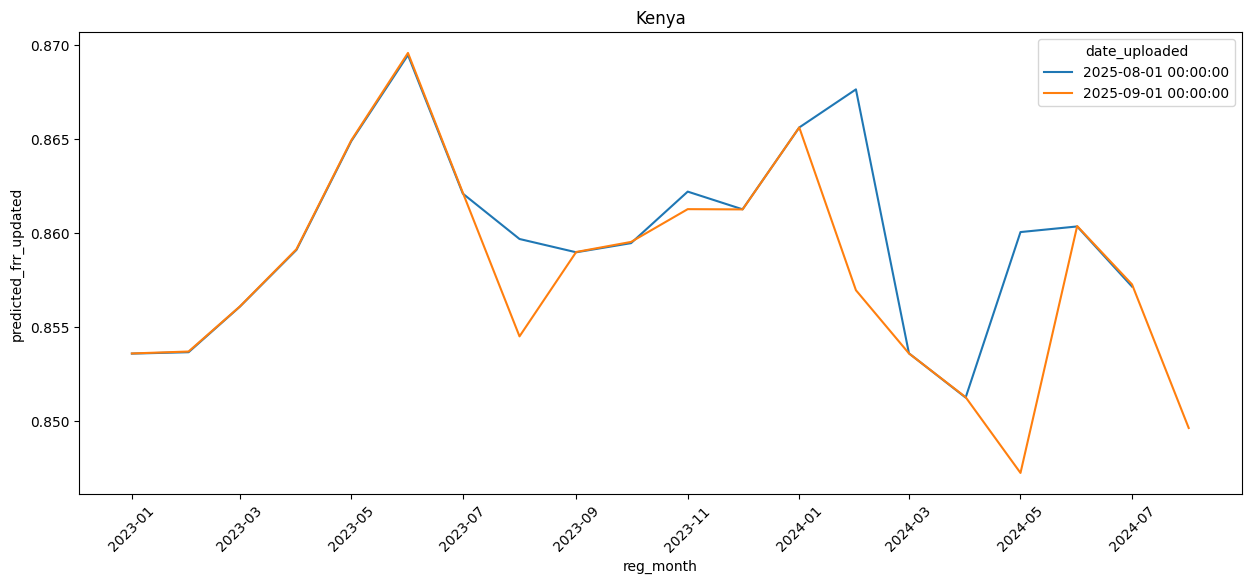

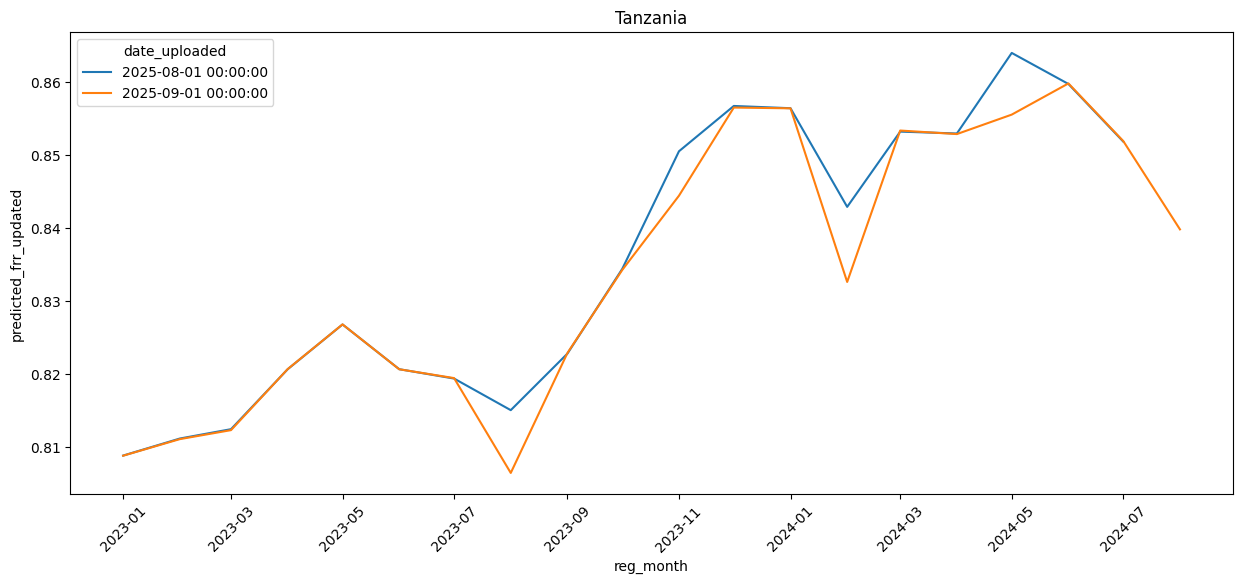

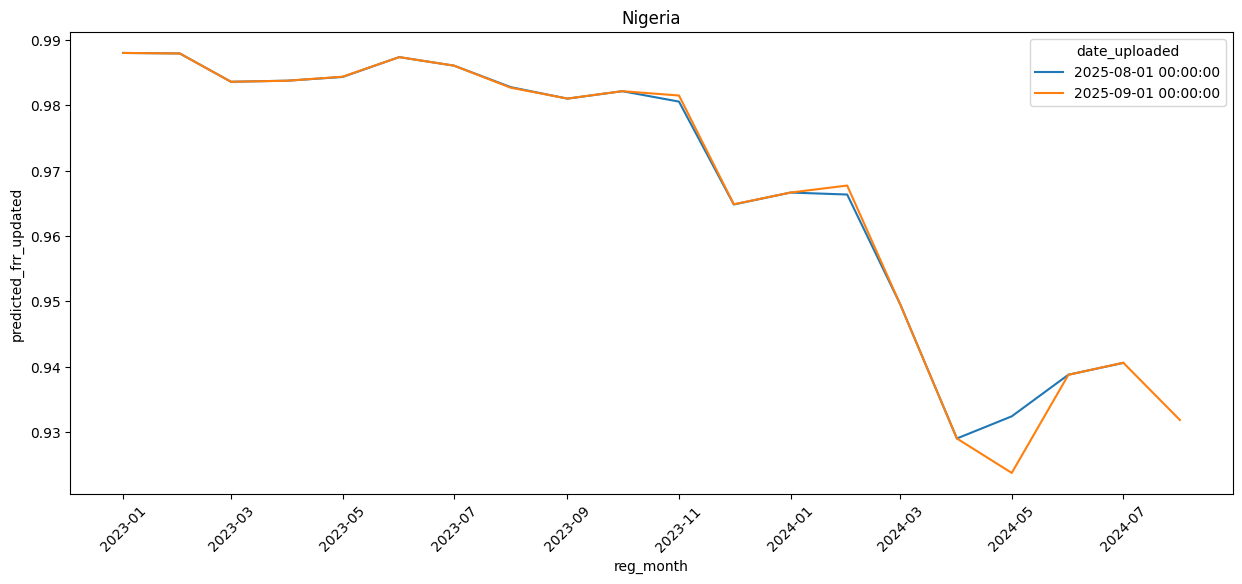

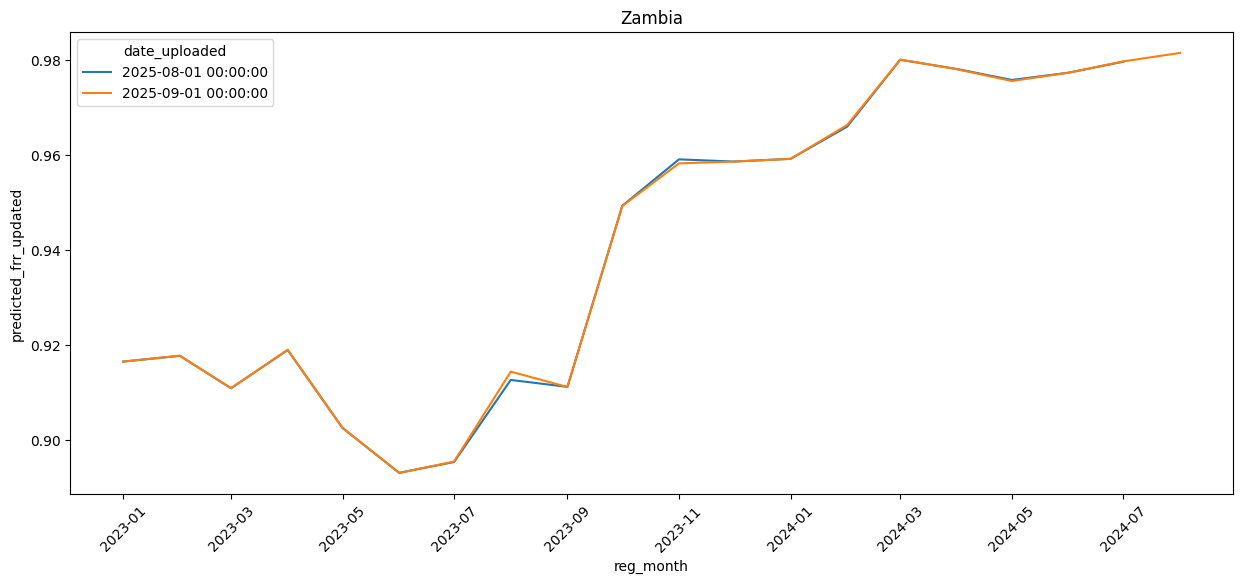

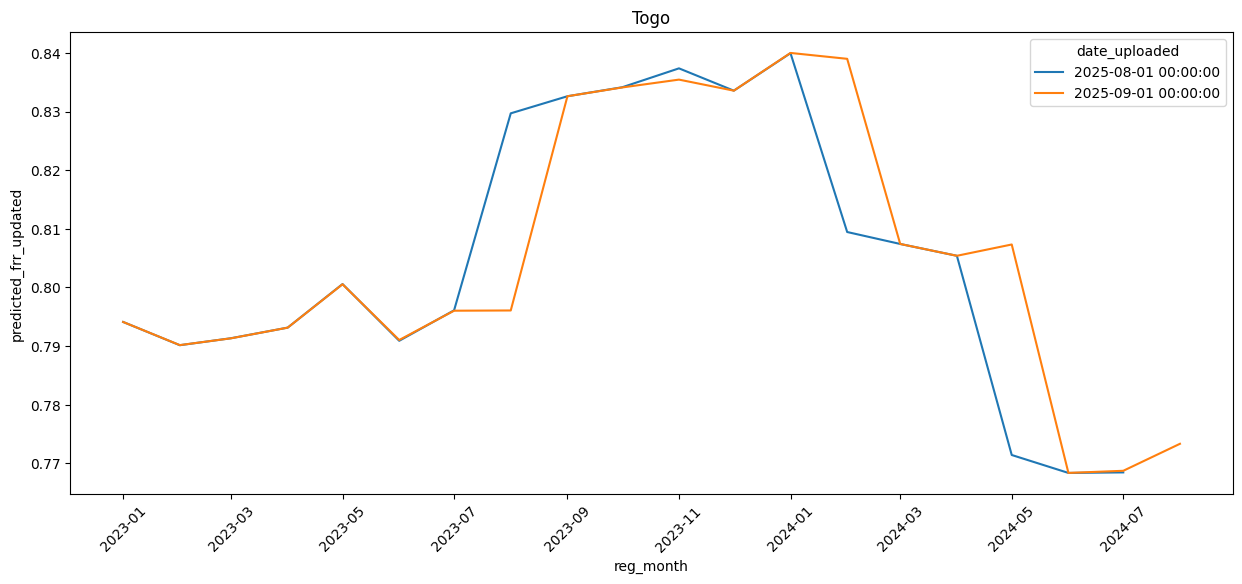

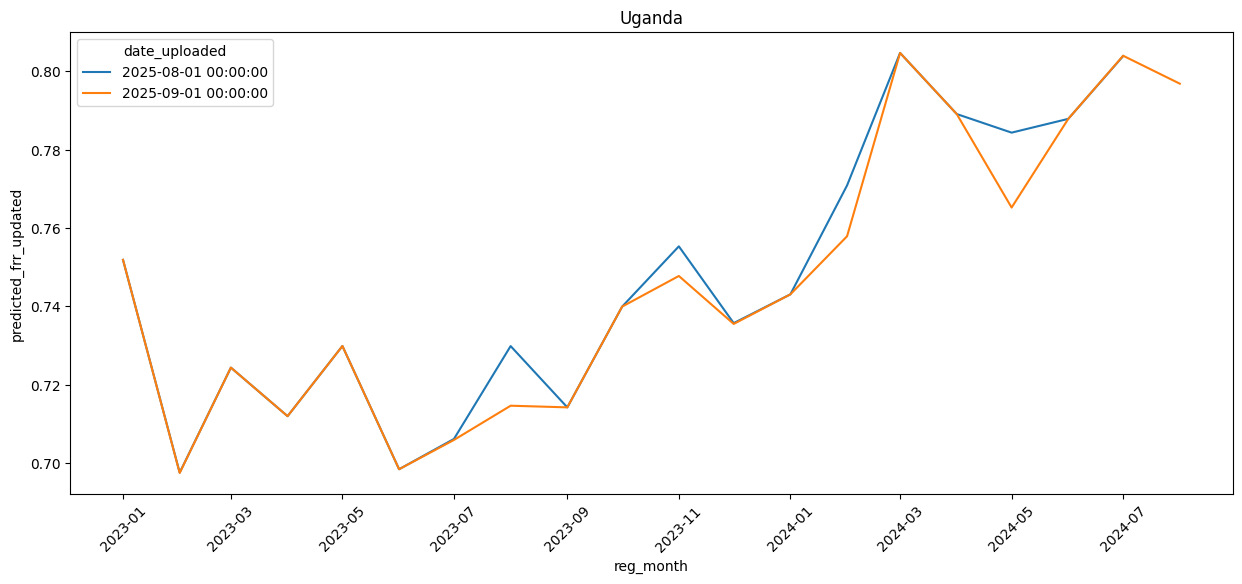

In [58]:
df_country = df.groupby(["country", "reg_month", "date_uploaded"]).agg(
    count_average=("count_units", lambda x: int(x.mean())),
    predicted_fr = ("predicted_revenue_3_years_50", "sum"),
    total_fr = ("total_follow_on_revenue_current_usd", "sum")
).reset_index()
df_country["predicted_frr_updated"] = df_country.predicted_fr/df_country.total_fr
df_country = df_country.drop(['total_fr', 'predicted_fr'], axis=1)
# products = ["Lanterns", "Phones", "SHS Entry-Level", "SHS with TV", "SHS without TV", "SHS Entry-Level Upgrade", "SHS with TV Upgrade"]
# df_country = df_country[df_country.product_group.isin(products)]
df_country

for country in ["Kenya", "Tanzania", "Nigeria", "Zambia", "Togo", "Uganda"]:
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=df_country[(df_country.country==country) & (df_country.reg_month>="2023-01-01")], x="reg_month", y="predicted_frr_updated",\
                  hue="date_uploaded")
    # sns.lineplot(data=df_country, x="reg_month", y="frr_prediction_50")
    plt.xticks(rotation=45)
    plt.title(country)
    plt.show()

In [59]:
df_country[df_country.country=="Kenya"].tail(10)

,country,reg_month,date_uploaded,count_average,predicted_frr_updated
400,Kenya,2024-03-01,2025-09-01,72,0.853616
401,Kenya,2024-04-01,2025-08-01,71,0.851269
402,Kenya,2024-04-01,2025-09-01,70,0.851291
403,Kenya,2024-05-01,2025-08-01,73,0.860068
404,Kenya,2024-05-01,2025-09-01,73,0.847263
405,Kenya,2024-06-01,2025-08-01,61,0.860366
406,Kenya,2024-06-01,2025-09-01,61,0.860386
407,Kenya,2024-07-01,2025-08-01,58,0.857171
408,Kenya,2024-07-01,2025-09-01,58,0.857287
409,Kenya,2024-08-01,2025-09-01,52,0.849652
